In [1]:
from src.dataset_analyzer import (cluster_by_mgp, fog_index, get_chi2, get_flash_readibility,
                   get_htz, get_rtd, get_trigram_assisiations,
                   tokenize_from_list_strings)
import pandas as pd

In [2]:
data = []
with open("data/SMSSpamCollection.txt") as f:
    for line in f.readlines():
        data.append(tuple(line.split("\t")))

data = pd.DataFrame(data, columns=["label", "text"])
data = data[["text", "label"]]

In [4]:
data

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...\n,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?\n,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [5]:
from src.dataset_analyzer.core import tokenize_from_list_strings

In [7]:
from nltk import word_tokenize
tokens = [word_tokenize(x) for x in data.text.to_list()]

In [8]:
tokens[0]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [9]:
labels = cluster_by_mgp(tokens, k=10)

In stage 0: transferred 4395 clusters with 10 clusters populated
In stage 1: transferred 2752 clusters with 10 clusters populated
In stage 2: transferred 1980 clusters with 10 clusters populated
In stage 3: transferred 1409 clusters with 10 clusters populated
In stage 4: transferred 982 clusters with 10 clusters populated
In stage 5: transferred 658 clusters with 10 clusters populated
In stage 6: transferred 424 clusters with 10 clusters populated
In stage 7: transferred 365 clusters with 10 clusters populated
In stage 8: transferred 322 clusters with 10 clusters populated
In stage 9: transferred 330 clusters with 10 clusters populated
In stage 10: transferred 340 clusters with 10 clusters populated
In stage 11: transferred 332 clusters with 10 clusters populated
In stage 12: transferred 328 clusters with 10 clusters populated
In stage 13: transferred 324 clusters with 10 clusters populated
In stage 14: transferred 318 clusters with 10 clusters populated
In stage 15: transferred 329 cl

In [11]:
data["mgp"] = labels

In [25]:
data[data.mgp == 1].label.value_counts()

spam    100
ham      31
Name: label, dtype: int64

In [17]:
ham = tokenize_from_list_strings(data[data.label == 'ham'].text.to_list(), ngram=1)
spam = tokenize_from_list_strings(data[data.label == 'spam'].text.to_list(), ngram=1)

In [14]:
trigrams[0]

'Go'

In [43]:
from nltk import ngrams
ngrams_ = ngrams(trigrams, 3)

In [48]:
trigrams[0]

'Go'

In [10]:
res = get_trigram_assisiations(trigrams)

In [5]:
lexicon = get_htz(data)

/home/astromis/git_projects/dataset_analyzer/src/dataset_analyzer/core.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  texts = np.array(texts)


In [6]:
lexicon

,ham,spam
0,come,FREE
1,;,T
2,home,STOP
3,going,Nokia
4,i,16
5,...,service
6,too,Orange
7,did,>
8,him,award
9,much,await


In [15]:
len(trigrams)

91181

In [19]:
get_rtd(ham,spam).head(20)

,index,word,rtd,rank in our corpus,rank in common one
0,0,I,36.733502,0,61
1,1,...,28.165420,3,478
2,2,i,23.590474,6,463
3,3,call,21.670428,53,3
4,4,FREE,21.469820,8227,17
5,5,Call,19.359820,505,12
6,6,or,18.442193,58,5
7,7,..,18.360569,11,270
8,8,to,17.993072,2,0
9,9,T,17.902884,8951,34


In [4]:
from src.dataset_analyzer.visualization import get_freq_plot, plot_token_diff, get_hist, entity_bar_plot, get_word_cloud, plot_lda_vis

/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import MutableMapping
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable, Mapping
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable, Mapping
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'co

/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  if isinstance(obj, collections.Iterator):
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:531: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  _png.write_png(renderer._renderer, fh,
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:531: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  _png

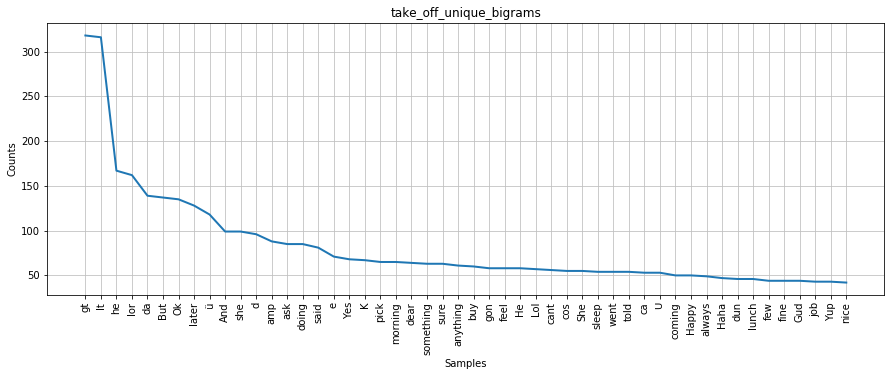

In [5]:
plot_token_diff(
                tokenize_from_list_strings(data[data.label == "ham"].text.to_list(), ngram=1),
                tokenize_from_list_strings(data[data.label == "spam"].text.to_list(), ngram=1),
                title="take_off_unique_bigrams")

/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:531: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  _png.write_png(renderer._renderer, fh,
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:531: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  _png.write_png(renderer._renderer, fh,
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:531: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  _png.write_png(renderer._renderer, fh,
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:531: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  _png.write_png(renderer._renderer, fh,
/home/astromis/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:531: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  _png.write_png(rend

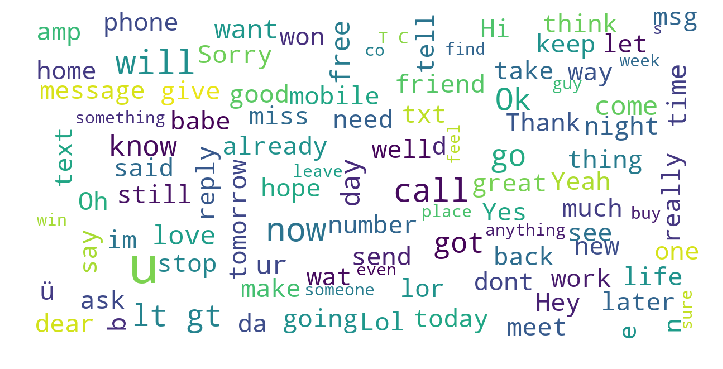

In [8]:
get_word_cloud(' '.join(data.text.to_list()))

In [9]:
from src.dataset_analyzer.sentiments import DostoevskyAnalyzer

In [10]:
dostoevsky = DostoevskyAnalyzer()

In [11]:
dostoevsky.apply_df(data)

,text,label,predicted_sentiment,sentiment_score
0,"Go until jurong point, crazy.. Available only ...",ham,neutral,0.884049
1,Ok lar... Joking wif u oni...\n,ham,neutral,0.672342
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,neutral,0.992664
3,U dun say so early hor... U c already then say...,ham,neutral,0.921932
4,"Nah I don't think he goes to usf, he lives aro...",ham,neutral,0.855861
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam,neutral,0.983095
5570,Will ü b going to esplanade fr home?\n,ham,neutral,0.990884
5571,"Pity, * was in mood for that. So...any other s...",ham,neutral,0.914911
5572,The guy did some bitching but I acted like i'd...,ham,neutral,0.863402
